# 📝 Tarea: Implementación de una Red Neuronal Avanzada (CNN o LSTM)

### 🎯 Objetivo

El objetivo de esta actividad es **aplicar un modelo de red neuronal profunda especializado (LSTM o CNN) para resolver un problema de clasificación supervisada**.
Con este ejercicio los estudiantes explorarán arquitecturas más avanzadas que los MLP, enfocadas en **patrones secuenciales** (LSTM) o **patrones espaciales/locales** (CNN), entendiendo su funcionamiento básico y cómo se entrenan en la práctica.

### 📊 Tipo de problema

* **Clasificación supervisada**: el modelo aprende a asignar etiquetas de clase a partir de un conjunto de ejemplos previamente conocidos.
* Dependiendo del dataset elegido, la variable objetivo puede ser:

  * **Binaria** (dos clases, p. ej. positivo/negativo).
  * **Multiclase** (más de dos clases, p. ej. categorías A, B, C…).


### 🔍 Variable objetivo

* Es una **variable categórica**.
* El modelo debe aprender a **predecir la clase correcta** en función de los patrones presentes en los datos (secuencias o imágenes).


### ⚙️ ¿Cómo se modela con LSTM o CNN?

1. **Capa de entrada**

   * Para **LSTM**: los datos se organizan como una **secuencia temporal** (ej. series de valores en el tiempo).
   * Para **CNN**: los datos se organizan en **matrices de características** donde el modelo aprende patrones locales (ej. imágenes, texto representado como embeddings, datos tabulares con estructura).

2. **Capas ocultas**

   * **LSTM**: cada celda mantiene una “memoria” de lo anterior en la secuencia, lo que permite capturar dependencias temporales.
   * **CNN**: aplica **filtros convolucionales** que detectan patrones locales (bordes, formas, repeticiones) y los combinan en niveles superiores.

3. **Capa de salida**

   * Para clasificación binaria: una neurona con activación sigmoide → devuelve una probabilidad entre 0 y 1.
   * Para multiclase: tantas neuronas como clases, con activación softmax → devuelve una distribución de probabilidades sobre las clases.

4. **Función de pérdida**

   * **Binaria**: entropía cruzada binaria.
   * **Multiclase**: entropía cruzada categórica.

5. **Entrenamiento**

   * El modelo ajusta sus parámetros mediante retropropagación.
   * Se trabaja con lotes de datos (mini-batches) y múltiples épocas de entrenamiento.

6. **Evaluación**

   * Matriz de confusión y métricas: accuracy, precision, recall, F1-score.
   * En multiclase, se recomienda también macro/micro promedio de métricas.


### 📂 Dataset

* El dataset dependerá de la modalidad elegida:

  * **LSTM**: usar una **serie temporal** (ejemplo: valores de sensores, secuencias numéricas, texto).
  * **CNN**: usar un dataset de **imágenes** o datos con estructura matricial (ejemplo: MNIST para dígitos escritos a mano).


### 📋 Instrucciones generales

1. Selecciona un dataset adecuado (serie temporal o imágenes).
2. Define el problema de clasificación (binaria o multiclase).
3. Prepara los datos en el formato correcto (secuencias para LSTM, matrices para CNN).
4. Construye y entrena una red LSTM o CNN básica.
5. Evalúa su desempeño con métricas apropiadas.
6. Interpreta los resultados: ¿qué patrones parece haber aprendido? ¿qué limitaciones observas?

## Opción 1 Low-Code: Visualizando el Aprendizaje de una CNN con MNIST

### 🎯 Objetivo

Entrenar una red neuronal convolucional (CNN) para clasificar imágenes de dígitos escritos a mano (MNIST), y visualizar qué características aprende cada capa. Al final, se evaluará el modelo con una matriz de confusión y un reporte de clasificación.

## 📦 Parte 1: Definición y entrenamiento del modelo

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importamos la base de datos MNIST desde Keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255 # Normalizamos a [0, 1]. El -1 infiere el tamaño del lote de forma automática (toma todo el lote). El 1 es el canal de color (escala de grises).
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

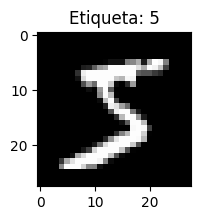

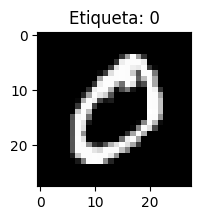

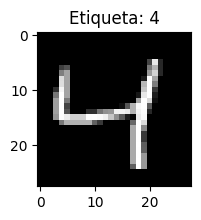

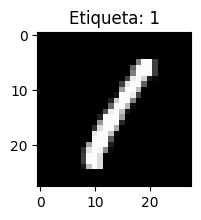

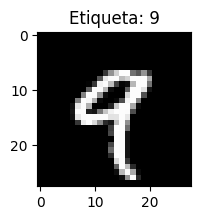

In [3]:
import matplotlib.pyplot as plt

# Mostramos las primeras 5 imágenes
for i in range(5):
    plt.figure(figsize=(2, 2)) # Tamaño de la figura en pulgadas
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta: {y_train[i]}')
    plt.show() 

In [4]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers

# Definir la entrada de la red (una imagen de 28x28 en escala de grises)
inputs = Input(shape=(28, 28, 1))   # 👈 CAMBIA AQUÍ alto, ancho, de la imagen

# Primer bloque convolucional: detecta bordes y patrones simples
x = layers.Conv2D(8, (3, 3), activation='relu', name='conv1')(inputs)
x = layers.MaxPooling2D((2, 2))(x)  # Reduce la dimensión y conserva lo más relevante

# Segundo bloque convolucional: detecta combinaciones más complejas (curvas, esquinas)
x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Capa densa para clasificación final
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)  # 👈 CAMBIA AQUÍ a 10, clases posibles (0-9)

# Compilar el modelo
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
print(model.summary())

# Entrenar el modelo por 5 épocas
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        25,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9291 - loss: 0.2354 - val_accuracy: 0.9743 - val_loss: 0.0830
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0794 - val_accuracy: 0.9817 - val_loss: 0.0674
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9814 - loss: 0.0601 - val_accuracy: 0.9862 - val_loss: 0.0519
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0.9858 - val_loss: 0.0435
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9840 - val_loss: 0.0536


### 🧠 Preguntas para reflexionar (Parte 1)

1. ¿Por qué usamos una entrada de tamaño `(28, 28, 1)`? ¿Qué representa cada dimensión?
2. En la primera capa convolucional usamos 8 filtros de tamaño 3×3. ¿Qué significan estos filtros?
3. ¿Qué efecto tiene `MaxPooling2D` sobre la salida de la convolución?
4. ¿Por qué la última capa tiene 10 neuronas y qué significa la función `softmax` en este contexto?
5. Observa el `model.summary()` y explica:

   * ¿Cómo cambia el tamaño del tensor a lo largo de las capas?
   * ¿Por qué disminuyen las dimensiones espaciales?
   * ¿Por qué aumenta el número de filtros?


## 🔍 Parte 2: Visualización de mapas de activación

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


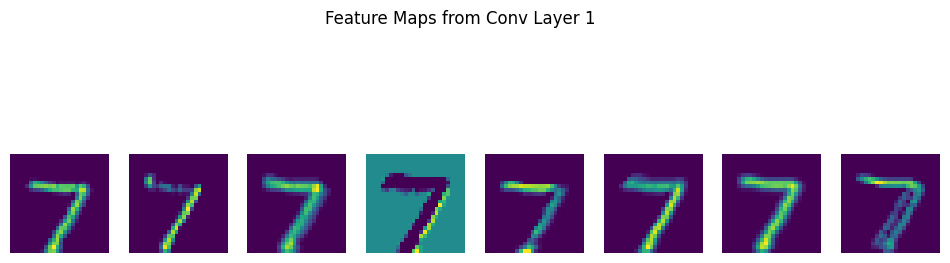

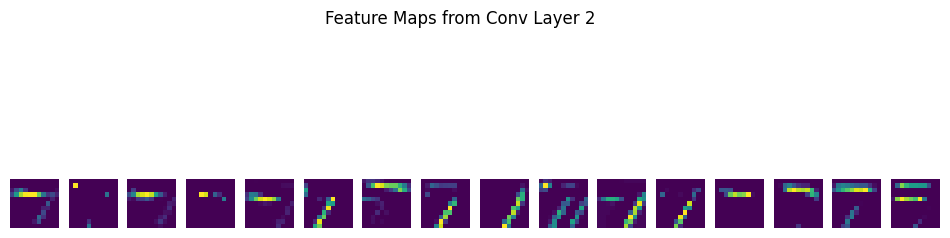

In [5]:
# Seleccionar una imagen del conjunto de prueba
img = x_test[0:1]

# Crear un modelo que devuelva las salidas intermedias de las capas convolucionales
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtener los mapas de características
feature_maps = feature_model.predict(img)

# Visualizar los mapas de cada capa
import matplotlib.pyplot as plt

for i, fmap in enumerate(feature_maps):
    num_filters = fmap.shape[-1]
    plt.figure(figsize=(12, 4))
    for j in range(num_filters):
        plt.subplot(1, num_filters, j+1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"Feature Maps from Conv Layer {i+1}")
    plt.show()

### 🧠 Pregunta (Parte 2)

> Describe lo que observas en los mapas de características:
>
> * ¿La primera capa detecta bordes o contornos?
> * ¿La segunda capa comienza a detectar formas más complejas como bucles o esquinas?
> * ¿Qué tanto se reduce la imagen con las capas de `MaxPooling`?


## 📊 Parte 3: Evaluación del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


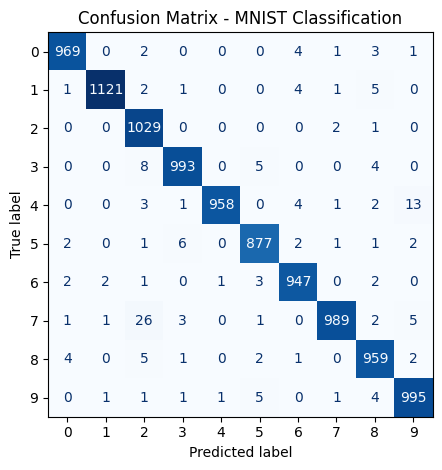

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      1.00      0.98      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [6]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np

# Predecir clases
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir probabilidades en etiquetas

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    cmap='Blues',
    colorbar=False,
    display_labels=np.arange(10)
)
plt.title("Confusion Matrix - MNIST Classification")
plt.grid(False)
plt.tight_layout()
plt.show()

# Reporte de métricas por clase
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

### 🧠 Preguntas (Parte 3)

1. ¿Qué dígitos fueron más fáciles de clasificar?
2. ¿Dónde se cometieron más errores? ¿En qué clases?
3. ¿Qué métrica destacarías en el reporte (`precision`, `recall`, `f1-score`) y por qué?